In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import os

import analysis_utils as aute

In [2]:
# #################
# ### Constants ###
# #################

date_study_end = pd.Timestamp("23-12-2023")
path_to_cuest = "../Cuestionarios/"

In [3]:
os.listdir("../Cuestionarios")

['CHATBOTs_CUESTIONARIO_BFI.xlsx',
 'CHATBOTs_Demografico.xlsx',
 'CHATBOTs_E.xlsx',
 'CHATBOTs_F.xlsx',
 'CHATBOTs_LSAS.xlsx',
 'CHATBOTs_N1.xlsx',
 'CHATBOTs_N2.xlsx',
 'CHATBOTs_PERCEPCIÓN_AVATARES.xlsx',
 'CHATBOTs_R.xlsx',
 'CHATBOTs_RELAP.xlsx',
 'CHATBOTs_SENSORES_POST.xlsx',
 'CHATBOTs_SENSORES_PRE.xlsx',
 'CHATBOTs_STAI-Y1.xlsx',
 'CHATBOTs_SUS.xlsx',
 'CHATBOTs_T.xlsx',
 'CHATBOTs_TECA.xlsx',
 'CHATBOTs_VAS-E.xlsx',
 'PostProcessedCuest']

## STAI-Y1

In [4]:
df_stai_y1 = pd.read_excel("../Cuestionarios/CHATBOTs_STAI-Y1.xlsx")
questions_stai_y1 = dict(df_stai_y1.loc[0])
df_stai_y1 = pd.read_excel("../Cuestionarios/CHATBOTs_STAI-Y1.xlsx", skiprows=[1])
print("Shape", df_stai_y1.shape)
print("Columns", df_stai_y1.columns)

Shape (25, 30)
Columns Index(['respondent_id', 'collector_id', 'date_created', 'date_modified',
       'ip_address', 'email_address', 'first_name', 'last_name', 'custom_1',
       'Usuario',
       'A continuación, encontrará unas frases que se utilizan corrientemente para describirse uno a sí mismo. Lea cada frase y señale la puntuación de "nada" a "mucho" que indique mejor cómo se siente usted ahora mismo, en este momento. No hay respuestas buenas ni malas. No emplee demasiado tiempo en cada frase y conteste señalando la respuesta que mejor describa su situación actual.',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29'],
      dtype='object')


In [5]:
from_cat_to_num_dict = {"Nada": 1, "Algo": 2, "Bastante": 3, "Mucho": 4}

In [6]:
df_stai_y1["Unnamed: 11"]

0     Bastante
1          NaN
2     Bastante
3         Algo
4         Algo
5        Mucho
6     Bastante
7     Bastante
8        Mucho
9     Bastante
10    Bastante
11        Algo
12       Mucho
13        Algo
14    Bastante
15    Bastante
16       Mucho
17        Algo
18    Bastante
19        Nada
20    Bastante
21    Bastante
22    Bastante
23        Algo
24         NaN
Name: Unnamed: 11, dtype: object

In [7]:
cols_see = [
    'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
    'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
    'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
    'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
    'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29'
]

for col in cols_see:
    print(df_stai_y1[col].nunique())

4
3
3
4
3
4
4
3
3
4
3
3
3
3
4
3
3
4
4


### BFI

In [8]:
df_bfi = pd.read_excel("../Cuestionarios/CHATBOTs_CUESTIONARIO_BFI.xlsx")
df_bfi.columns

Index(['respondent_id', 'collector_id', 'date_created', 'date_modified',
       'ip_address', 'email_address', 'first_name', 'last_name', 'custom_1',
       'Usuario',
       'Valore de 1 a 5 cada afirmación del cuestionario siguiendo el siguiente criterio:',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42',
       'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46',
       'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50',
       'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53'],
      dtype='obje

### Demographic

In [9]:
df_demo = pd.read_excel("../Cuestionarios/CHATBOTs_Demografico.xlsx", skiprows=[1])
print("Shape", df_demo.shape)
print(df_demo.columns)

Shape (29, 39)
Index(['respondent_id', 'collector_id', 'date_created', 'date_modified',
       'ip_address', 'email_address', 'first_name', 'last_name', 'custom_1',
       'Usuario', 'Marque con una su género:',
       'Escriba su fecha de nacimiento', 'Escriba su nacionalidad',
       'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Marque con una cruz la situación en la que se encuentra',
       'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20',
       'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24',
       'Unnamed: 25', 'Marque su nivel de estudios', 'Unnamed: 27',
       'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31',
       'Marque de forma aproximada su nivel de ingresos anuales',
       'Señala su horientación sexual',
       'Sueles jugar a videojuegos de aventura, acción, estrategia, simulación, MMORPG?',
       'Unnamed: 35', '¿Has estado alguna vez en terapia psicológica?',
       '¿Tomas alguna medicación psicofarmacológica?', 'Unnamed: 

In [10]:
df_demo

,respondent_id,collector_id,date_created,date_modified,ip_address,email_address,first_name,last_name,custom_1,Usuario,...,Unnamed: 29,Unnamed: 30,Unnamed: 31,Marque de forma aproximada su nivel de ingresos anuales,Señala su horientación sexual,"Sueles jugar a videojuegos de aventura, acción, estrategia, simulación, MMORPG?",Unnamed: 35,¿Has estado alguna vez en terapia psicológica?,¿Tomas alguna medicación psicofarmacológica?,Unnamed: 38
0,118185518762,448136109,2022-11-25 13:14:12,2022-11-25 13:18:44,158.42.69.160,NaN,NaN,NaN,NaN,User_19_CB,...,Bachillerato/Formación profesional,NaN,NaN,Menos de 15.000€,Heterosexual,No,NaN,"Sí, en el último año","Sí, ansiolíticos",NaN
1,118185388618,448136109,2022-11-25 10:53:53,2022-11-25 10:57:15,158.42.59.223,NaN,NaN,NaN,NaN,User_18_CB,...,Bachillerato/Formación profesional,NaN,NaN,Menos de 15.000€,Heterosexual,No,NaN,"Sí, en el último año",No,NaN
2,118185331344,448136109,2022-11-25 08:32:33,2022-11-25 09:00:54,158.42.69.160,NaN,NaN,NaN,NaN,User_17_CB,...,Bachillerato/Formación profesional,NaN,NaN,Menos de 15.000€,Heterosexual,No,NaN,Nunca,No,NaN
3,118184768554,448136109,2022-11-24 12:49:16,2022-11-24 12:54:07,158.42.69.160,NaN,NaN,NaN,NaN,User_16_CB,...,NaN,Estudios universitarios,NaN,Menos de 15.000€,Heterosexual,No,NaN,"Sí, hace más de 1 año",No,NaN
4,118184701881,448136109,2022-11-24 10:51:06,2022-11-24 10:59:38,158.42.69.160,NaN,NaN,NaN,NaN,User_15_CB,...,Bachillerato/Formación profesional,NaN,NaN,Menos de 15.000€,Heterosexual,No,NaN,Nunca,No,NaN
5,118184626872,448136109,2022-11-24 08:30:06,2022-11-24 08:49:21,158.42.69.160,NaN,NaN,NaN,NaN,User_14_CB,...,NaN,NaN,Estudios de postgrado (máster y/o doctorado),Menos de 15.000€,Heterosexual,No,NaN,"Sí, hace más de 5 años",No,NaN
6,118183912202,448136109,2022-11-23 12:48:48,2022-11-23 13:01:05,158.42.69.160,NaN,NaN,NaN,NaN,User_13_CB,...,NaN,Estudios universitarios,NaN,Entre 15.001€ y 30.000€,Homosexual,"Sí, estimas de numero de horas que le dedicas ...",3,Nunca,No,NaN
7,118183837763,448136109,2022-11-23 10:57:38,2022-11-23 11:06:19,158.42.69.160,NaN,NaN,NaN,NaN,Piloto_12_CB,...,Bachillerato/Formación profesional,NaN,NaN,NS/NC,Heterosexual,No,NaN,Nunca,No,NaN
8,118183773404,448136109,2022-11-23 08:41:11,2022-11-23 09:07:23,158.42.69.160,NaN,NaN,NaN,NaN,Piloto_11_CB,...,Bachillerato/Formación profesional,NaN,NaN,Entre 30.001€ y 60.000€,Heterosexual,No,NaN,"Sí, hace más de 5 años",No,NaN
9,118181863918,448136109,2022-11-21 10:02:22,2022-11-21 10:43:07,158.42.69.160,NaN,NaN,NaN,NaN,User_10_CB,...,NaN,Estudios universitarios,NaN,Menos de 15.000€,Heterosexual,No,NaN,"Sí, hace más de 5 años",No,NaN


In [11]:
age_list = []
for date in df_demo["Escriba su fecha de nacimiento"].values:
    if isinstance(date, str):
        subj_age = date_study_end - pd.Timestamp(date)
        age_list.append(np.round(subj_age.days/365, 2))
    elif np.isnan(date):
        age_list.append(np.nan)
    else:
        age_list.append(np.nan)
        print("Other format", date)
        
print(age_list)

df_demo["AgeYears"] = age_list

Other format 1999
[20.45, 21.1, 43.41, 21.54, 28.38, 27.95, 31.72, 23.75, 51.36, 22.74, 23.08, 25.3, 47.12, 46.65, 32.51, 23.73, 21.01, 43.17, 23.65, 26.85, 28.12, 30.76, nan, 23.12, 24.78, nan, nan, nan, nan]


In [12]:
gender_f_name = "Marque con una su género:"
df_demo["GenderFem"] = (df_demo[gender_f_name] == "Femenino")*1
df_demo["GenderOther"] = ((df_demo[gender_f_name] != "Femenino") * (df_demo[gender_f_name] != "Masculino"))*1
df_demo[["GenderFem", "GenderOther"]].head(8)

,GenderFem,GenderOther
0,1,0
1,1,0
2,1,0
3,1,0
4,0,0
5,1,0
6,0,0
7,0,0


In [13]:
v_f_name = "Sueles jugar a videojuegos de aventura, acción, estrategia, simulación, MMORPG?"
v_num_f_name = "Unnamed: 35"
print(df_demo[v_f_name].unique())

num_h_play_list = [int(v.split()[0]) if isinstance(v, str) else v for v in df_demo[v_num_f_name].values]
df_demo["NumHPlayVGame"] = num_h_play_list

df_demo["PlayVGame"] = (df_demo[v_f_name] == "Sí, estimas de numero de horas que le dedicas cada día:")*1

df_demo[[v_f_name, "PlayVGame", v_num_f_name, "NumHPlayVGame"]].head(8)

['No' 'Sí, estimas de numero de horas que le dedicas cada día:' nan]


,"Sueles jugar a videojuegos de aventura, acción, estrategia, simulación, MMORPG?",PlayVGame,Unnamed: 35,NumHPlayVGame
0,No,0,NaN,NaN
1,No,0,NaN,NaN
2,No,0,NaN,NaN
3,No,0,NaN,NaN
4,No,0,NaN,NaN
5,No,0,NaN,NaN
6,"Sí, estimas de numero de horas que le dedicas ...",1,3,3.0
7,No,0,NaN,NaN


In [14]:
ps_f_name = "¿Has estado alguna vez en terapia psicológica?"
print(df_demo[ps_f_name].unique())

df_demo["OrdinalPs"] = [0] * df_demo.shape[0]

df_demo.loc[df_demo[ps_f_name]=="Sí, en el último año", "OrdinalPs"] = 1
df_demo.loc[df_demo[ps_f_name]=="Sí, hace más de 1 año", "OrdinalPs"] = 2
df_demo.loc[df_demo[ps_f_name]=="Sí, hace más de 5 años", "OrdinalPs"] = 3
df_demo.loc[pd.isna(df_demo[ps_f_name]), "OrdinalPs"] = -1

df_demo[[ps_f_name, "OrdinalPs"]].head(8)

['Sí, en el último año' 'Nunca' 'Sí, hace más de 1 año'
 'Sí, hace más de 5 años' nan]


,¿Has estado alguna vez en terapia psicológica?,OrdinalPs
0,"Sí, en el último año",1
1,"Sí, en el último año",1
2,Nunca,0
3,"Sí, hace más de 1 año",2
4,Nunca,0
5,"Sí, hace más de 5 años",3
6,Nunca,0
7,Nunca,0


In [15]:
m_f_name = "¿Tomas alguna medicación psicofarmacológica?"
print(df_demo[m_f_name].unique())

df_demo["NoMedicine"] = ( (df_demo[m_f_name] == "No") | (pd.isna(df_demo[m_f_name])) ) * 1

df_demo[[m_f_name, "NoMedicine"]].head(8)

['Sí, ansiolíticos' 'No' 'Sí, antidepresivos' nan]


,¿Tomas alguna medicación psicofarmacológica?,NoMedicine
0,"Sí, ansiolíticos",0
1,No,1
2,No,1
3,No,1
4,No,1
5,No,1
6,No,1
7,No,1


In [16]:
df_demo.to_csv(path_to_cuest + "PostProcessedCuest/DemographicPostProc.csv", sep=",")

## LSAS

In [17]:
df_lsas = pd.read_excel("../Cuestionarios/CHATBOTs_LSAS.xlsx", skiprows=[1])
print(df_lsas.columns)
print("Shape", df_lsas.shape)
display(df_lsas.head(8))

Index(['respondent_id', 'collector_id', 'date_created', 'date_modified',
       'ip_address', 'email_address', 'first_name', 'last_name', 'custom_1',
       'Usuario',
       'Por favor, lea con atención cada grupo de afirmaciones y luego elija un afirmación de cada grupo, que mejor le representa COMO SE HA SENTIDO EN LAS ÚLTIMAS DOS SEMANAS.',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33',
       'Por favor, lea con atención cada grupo de afirmaciones y luego elija un afirmación de cada grupo, que mejor le representa COMO SE HA SENTIDO EN LAS ÚLTIMAS DOS SEMANAS..1',
       'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38',
       'Unnamed: 3

,respondent_id,collector_id,date_created,date_modified,ip_address,email_address,first_name,last_name,custom_1,Usuario,...,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57
0,118185530626,448135553,2022-11-25 13:14:53,2022-11-25 13:32:59,158.42.69.160,NaN,NaN,NaN,NaN,User_19_CB,...,En ocasiones lo evito,Habitualmente lo evit,Nunca lo evito,En ocasiones lo evito,Frecuentemente lo evito,Habitualmente lo evit,Habitualmente lo evit,Nunca lo evito,Nunca lo evito,Habitualmente lo evit
1,118185394356,448135553,2022-11-25 10:54:42,2022-11-25 11:10:36,158.42.59.223,NaN,NaN,NaN,NaN,User_18_CB,...,Frecuentemente lo evito,En ocasiones lo evito,Frecuentemente lo evito,En ocasiones lo evito,En ocasiones lo evito,En ocasiones lo evito,Nunca lo evito,Nunca lo evito,Frecuentemente lo evito,Nunca lo evito
2,118185335824,448135553,2022-11-25 08:32:50,2022-11-25 09:13:27,158.42.69.160,NaN,NaN,NaN,NaN,User_17_CB,...,En ocasiones lo evito,En ocasiones lo evito,Nunca lo evito,Nunca lo evito,En ocasiones lo evito,En ocasiones lo evito,En ocasiones lo evito,Nunca lo evito,Nunca lo evito,En ocasiones lo evito
3,118184773135,448135553,2022-11-24 12:49:34,2022-11-24 13:05:05,158.42.69.160,NaN,NaN,NaN,NaN,User_16_CB,...,Habitualmente lo evit,Habitualmente lo evit,En ocasiones lo evito,En ocasiones lo evito,Frecuentemente lo evito,En ocasiones lo evito,Frecuentemente lo evito,Nunca lo evito,En ocasiones lo evito,En ocasiones lo evito
4,118184706966,448135553,2022-11-24 10:51:44,2022-11-24 11:11:22,158.42.69.160,NaN,NaN,NaN,NaN,User_15_CB,...,Nunca lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito,En ocasiones lo evito,Nunca lo evito,Frecuentemente lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito
5,118184630912,448135553,2022-11-24 08:30:29,2022-11-24 08:59:35,158.42.69.160,NaN,NaN,NaN,NaN,User_14_CB,...,Frecuentemente lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito
6,118183918084,448135553,2022-11-23 12:49:03,2022-11-23 13:09:51,158.42.69.160,NaN,NaN,NaN,NaN,User_13_CB,...,Nunca lo evito,Nunca lo evito,Nunca lo evito,En ocasiones lo evito,Nunca lo evito,Nunca lo evito,En ocasiones lo evito,Nunca lo evito,En ocasiones lo evito,Nunca lo evito
7,118183841306,448135553,2022-11-23 10:58:00,2022-11-23 11:13:57,158.42.69.160,NaN,NaN,NaN,NaN,Piloto_12_CB,...,Nunca lo evito,Nunca lo evito,Nunca lo evito,En ocasiones lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito,Nunca lo evito


## N1 and N2

In [18]:
df_n1 = pd.read_excel("../Cuestionarios/CHATBOTs_N1.xlsx", skiprows=[1])
print(df_n1.columns)
print("Shape", df_n1.shape)
display(df_n1.head(8))

Index(['respondent_id', 'collector_id', 'date_created', 'date_modified',
       'ip_address', 'email_address', 'first_name', 'last_name', 'custom_1',
       'Usuario',
       'Tienes que elegir un numero entre 1 y 7, siendo 1 “me he notado muy forzado durante la conversación” y 7 “me he notado muy natural durante la conversación”.',
       'Tienes que elegir un numero entre 1 y 7, siendo 1 “ha sido una conversación artificial. No se parece nada a una conversación real” y 7 “ha sido una conversación realista. El contenido ha sido muy parecido a lo de una conversación real”.',
       'Siendo 1 "muy negativa", 5 "neutral" y 9 "muy positiva". Indica tu nivel de valencia de la conversación.',
       'Siendo 1 el estado de calma, 5 el estado normal y 9 el estado de excitación intensa. Indica tu nivel de arousal.',
       'El nivel en que has sentido que dominabas (controlabas a nivel emocional) el contenido de la conversación. Siendo 1 "no dominante", 5 "normal" y 9 "muy dominante". Indica t

,respondent_id,collector_id,date_created,date_modified,ip_address,email_address,first_name,last_name,custom_1,Usuario,...,Relajado,Sorpresa,Tristeza,Disgusto.1,Felicidad.1,Enfado.1,Miedo.1,Relajado.1,Sorpresa.1,Tristeza.1
0,114185900618,423466282,2022-11-25 14:16:37,2022-11-25 14:39:17,158.42.69.160,NaN,NaN,NaN,NaN,User_19_CB,...,42.0,87.0,0.0,28.0,61.0,0.0,4.0,50.0,50.0,4.0
1,114185819753,423466282,2022-11-25 11:50:52,2022-11-25 12:22:57,158.42.69.160,NaN,NaN,NaN,NaN,User_18_CB,...,50.0,4.0,2.0,7.0,1.0,3.0,2.0,62.0,1.0,1.0
2,114185762977,423466282,2022-11-25 10:09:39,2022-11-25 10:27:37,158.42.69.160,NaN,NaN,NaN,NaN,User_17_CB,...,50.0,50.0,2.0,2.0,2.0,2.0,2.0,50.0,2.0,1.0
3,114185112567,423466282,2022-11-24 13:46:51,2022-11-24 13:58:49,158.42.69.160,NaN,NaN,NaN,NaN,User_16_CB,...,50.0,22.0,3.0,5.0,4.0,3.0,4.0,80.0,31.0,2.0
4,114185034177,423466282,2022-11-24 11:43:07,2022-11-24 11:59:59,158.42.69.160,NaN,NaN,NaN,NaN,User_15_CB,...,0.0,0.0,1.0,1.0,51.0,0.0,0.0,90.0,0.0,0.0
5,114184951890,423466282,2022-11-24 09:39:12,2022-11-24 09:59:07,158.42.69.160,NaN,NaN,NaN,NaN,User_14_CB,...,74.0,50.0,3.0,1.0,2.0,2.0,1.0,8.0,2.0,3.0
6,114184164626,423466282,2022-11-23 13:38:46,2022-11-23 13:59:35,158.42.69.160,NaN,NaN,NaN,NaN,User_13_CB,...,94.0,50.0,0.0,0.0,24.0,0.0,0.0,96.0,3.0,0.0
7,114184090320,423466282,2022-11-23 11:54:30,2022-11-23 12:04:32,158.42.69.160,NaN,NaN,NaN,NaN,Piloto_12_CB,...,70.0,20.0,6.0,3.0,61.0,5.0,4.0,78.0,6.0,2.0


In [19]:
old_columns_name = [
    'Tienes que elegir un numero entre 1 y 7, siendo 1 “me he notado muy forzado durante la conversación” y 7 “me he notado muy natural durante la conversación”.',
    'Tienes que elegir un numero entre 1 y 7, siendo 1 “ha sido una conversación artificial. No se parece nada a una conversación real” y 7 “ha sido una conversación realista. El contenido ha sido muy parecido a lo de una conversación real”.',
    'Siendo 1 "muy negativa", 5 "neutral" y 9 "muy positiva". Indica tu nivel de valencia de la conversación.',
    'Siendo 1 el estado de calma, 5 el estado normal y 9 el estado de excitación intensa. Indica tu nivel de arousal.',
    'El nivel en que has sentido que dominabas (controlabas a nivel emocional) el contenido de la conversación. Siendo 1 "no dominante", 5 "normal" y 9 "muy dominante". Indica tu nivel de dominancia emocional.',
    'Siendo 1 "muy negativa", 5 "neutral" y 9 "muy positiva". Indica el nivel de valencia DEL AVATAR durante la conversación',
    'Siendo 1 el estado de calma, 5 el estado normal y 9 el estado de excitación intensa. Indica el nivel de arousal DEL AVATAR durante la conversación.',
    'El nivel en que ha sentido que EL AVATAR estaba dominado (controlando a nivel emocional) el contenido de la conversación. Siendo 1 "no dominante", 5 "normal" y 9 "muy dominante". Indica el nivel de dominancia emocional DEL AVATAR.'
]

new_columns_name = [
    "Question1", "Question2", "Question3", "Question4", "Question5", "Question6", "Question7", "Question8"
]

change_name_column_dict = dict(zip(old_columns_name, new_columns_name))

In [20]:
for old_c, new_c in change_name_column_dict.items():
    new_col_list = [int(v.split(".")[0]) if isinstance(v, str) else int(v) for v in df_n1[old_c].values]
    df_n1[new_c] = new_col_list
    
display(df_n1[new_columns_name].head(8))

,Question1,Question2,Question3,Question4,Question5,Question6,Question7,Question8
0,2,7,3,5,2,7,6,7
1,1,4,5,2,2,5,1,7
2,3,3,6,7,5,4,7,7
3,2,3,5,2,5,5,1,6
4,2,1,5,5,5,7,4,2
5,1,1,8,5,2,9,1,3
6,5,7,9,6,7,9,5,5
7,6,6,7,3,6,7,4,5


## Percepción avatares

In [21]:
df_pa = pd.read_excel("../Cuestionarios/CHATBOTs_PERCEPCIÓN_AVATARES.xlsx", skiprows=[1])
print(df_pa.columns)
print("Shape", df_pa.shape)
display(df_pa.head(8))

Index(['respondent_id', 'collector_id', 'date_created', 'date_modified',
       'ip_address', 'email_address', 'first_name', 'last_name', 'custom_1',
       'Usuario',
       'Pensando en los avatares con los que acabas de hablar, evalúa el contenido de las siguientes frases:',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
       'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29'],
      dtype='object')
Shape (22, 30)


,respondent_id,collector_id,date_created,date_modified,ip_address,email_address,first_name,last_name,custom_1,Usuario,...,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29
0,118185630851,448444258,2022-11-25 15:27:20,2022-11-25 15:30:49,158.42.69.160,NaN,NaN,NaN,NaN,User_19_CB,...,De acuerdo,Muy de acuerdo,Muy de acuerdo,Muy de acuerdo,Muy de acuerdo,Muy de acuerdo,De acuerdo,Muy de acuerdo,Muy de acuerdo,Muy de acuerdo
1,118185511627,448444258,2022-11-25 13:07:48,2022-11-25 13:12:33,158.42.69.160,NaN,NaN,NaN,NaN,User_18_CB,...,NaN,En desacuerdo,Neutral,En desacuerdo,Neutral,Neutral,Neutral,Neutral,En desacuerdo,Neutral
2,118185400162,448444258,2022-11-25 11:12:55,2022-11-25 11:18:56,158.42.69.160,NaN,NaN,NaN,NaN,User_17_CB,...,Neutral,De acuerdo,En desacuerdo,De acuerdo,De acuerdo,De acuerdo,Muy de acuerdo,En desacuerdo,Muy de acuerdo,Muy de acuerdo
3,118184837964,448444258,2022-11-24 14:39:57,2022-11-24 14:45:36,158.42.69.160,NaN,NaN,NaN,NaN,User_16_CB,...,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,Neutral,De acuerdo
4,118184764179,448444258,2022-11-24 12:40:09,2022-11-24 12:48:55,158.42.69.160,NaN,NaN,NaN,NaN,User_15_CB,...,En desacuerdo,Neutral,Neutral,De acuerdo,De acuerdo,De acuerdo,Neutral,Neutral,Neutral,Neutral
5,118184694960,448444258,2022-11-24 10:44:08,2022-11-24 10:49:39,158.42.69.160,NaN,NaN,NaN,NaN,User_14_CB,...,En desacuerdo,En desacuerdo,Muy en desacuerdo,De acuerdo,Neutral,De acuerdo,Muy de acuerdo,De acuerdo,Muy de acuerdo,De acuerdo
6,118183989496,448444258,2022-11-23 14:41:48,2022-11-23 14:45:25,158.42.69.160,NaN,NaN,NaN,NaN,User_13_CB,...,De acuerdo,En desacuerdo,De acuerdo,De acuerdo,De acuerdo,Neutral,De acuerdo,Neutral,Neutral,De acuerdo
7,118183900060,448444258,2022-11-23 12:44:11,2022-11-23 12:48:23,158.42.69.160,NaN,NaN,NaN,NaN,User_12_CB,...,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo,De acuerdo


## Avatars

### Happy

In [22]:
df_happy = pd.read_excel("../Cuestionarios/CHATBOTs_F.xlsx", skiprows=[1])
print(df_happy.shape)
print(df_happy.columns)

(21, 32)
Index(['respondent_id', 'collector_id', 'date_created', 'date_modified',
       'ip_address', 'email_address', 'first_name', 'last_name', 'custom_1',
       'Usuario',
       'Tienes que elegir un numero entre 1 y 7, siendo 1 “me he notado muy forzado durante la conversación” y 7 “me he notado muy natural durante la conversación”.',
       'Tienes que elegir un numero entre 1 y 7, siendo 1 “ha sido una conversación artificial. No se parece nada a una conversación real” y 7 “ha sido una conversación realista. El contenido ha sido muy parecido a lo de una conversación real”.',
       'Siendo 1 "muy negativa", 5 "neutral" y 9 "muy positiva". Indica tu nivel de valencia de la conversación.',
       'Siendo 1 el estado de calma, 5 el estado normal y 9 el estado de excitación intensa. Indica tu nivel de arousal.',
       'El nivel en que has sentido que dominabas (controlabas a nivel emocional) el contenido de la conversación. Siendo 1 "no dominante", 5 "normal" y 9 "muy dominante".

In [23]:
# ###########################
# ### Change column names ###
# ###########################

old_columns_name = [
    'Tienes que elegir un numero entre 1 y 7, siendo 1 “me he notado muy forzado durante la conversación” y 7 “me he notado muy natural durante la conversación”.',
    'Tienes que elegir un numero entre 1 y 7, siendo 1 “ha sido una conversación artificial. No se parece nada a una conversación real” y 7 “ha sido una conversación realista. El contenido ha sido muy parecido a lo de una conversación real”.',
    'Siendo 1 "muy negativa", 5 "neutral" y 9 "muy positiva". Indica tu nivel de valencia de la conversación.',
    'Siendo 1 el estado de calma, 5 el estado normal y 9 el estado de excitación intensa. Indica tu nivel de arousal.',
    'El nivel en que has sentido que dominabas (controlabas a nivel emocional) el contenido de la conversación. Siendo 1 "no dominante", 5 "normal" y 9 "muy dominante". Indica tu nivel de dominancia emocional.',
    'Siendo 1 "muy negativa", 5 "neutral" y 9 "muy positiva". Indica el nivel de valencia DEL AVATAR durante la conversación',
    'Siendo 1 el estado de calma, 5 el estado normal y 9 el estado de excitación intensa. Indica el nivel de arousal DEL AVATAR durante la conversación.',
    'El nivel en que ha sentido que EL AVATAR estaba dominado (controlando a nivel emocional) el contenido de la conversación. Siendo 1 "no dominante", 5 "normal" y 9 "muy dominante". Indica el nivel de dominancia emocional DEL AVATAR.'
]

new_columns_name = [
    "Question1", "Question2", "Question3", "Question4", "Question5", "Question6", "Question7", "Question8"
]

change_name_column_dict = dict(zip(old_columns_name, new_columns_name))

df_happy = df_happy.rename(columns=change_name_column_dict)

# #########################
# ### Change categories ###
# #########################

from_one_to_seven = {
    '1. Muy forzado': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7. Muy natural': 7
}
from_one_to_seven_2 = {
    '1. Muy artificial': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7. Muy realista': 7
}
from_one_to_nine = {
    '1. Muy negativa': 1, '2': 2, '3': 3, '4': 4, '5. Neutral': 5, '6': 6, '7': 7, '8': 8, '9. Muy positiva': 9
}
from_one_to_nine_arousal = {
    '1. Ninguno': 1, '2': 2, '3': 3, '4': 4, '5. Normal': 5, '6': 6, '7': 7, '8': 8, '9. Mucho': 9
}
from_one_to_nine_dom = {
    '1. No dominante': 1, '2': 2, '3': 3, '4': 4, '5. Normal': 5, '6': 6, '7': 7, '8': 8, '9. Muy dominante': 9
}
from_one_to_nine_pos = {
    '1. Muy negativa': 1, '2': 2, '3': 3, '4': 4, '5. Neutral': 5, '6': 6, '7': 7, '8': 8, '9. Muy positiva': 9
}
from_one_to_nine_calm = {
    '1. Calma': 1, '2': 2, '3': 3, '4': 4, '5. Normal': 5, '6': 6, '7': 7, '8': 8, '9. Excitación': 9
}
categories_dict_list = [
    from_one_to_seven,
    from_one_to_seven_2,
    from_one_to_nine,
    from_one_to_nine_arousal,
    from_one_to_nine_dom,
    from_one_to_nine_pos,
    from_one_to_nine_calm,
    from_one_to_nine_dom
]

change_value_per_column_dict = dict(zip(new_columns_name, categories_dict_list))

df_happy = df_happy.replace(change_value_per_column_dict)

### All avatars

In [24]:
personality_cuest_list = ["CHATBOTs_F", "CHATBOTs_T", "CHATBOTs_E", "CHATBOTs_R"]
personality_cuest_to_save_list = ["CuestAvatarHappy", "CuestAvatarSad", "CuestAvatarAngry", "CuestAvatarRelax"]

for i_pers, pers in enumerate(personality_cuest_list):
    data = pd.read_excel(path_to_cuest + pers + ".xlsx", skiprows=[1])
    
    # ###########################
    # ### Change column names ###
    # ###########################

    old_columns_name = [
        'Tienes que elegir un numero entre 1 y 7, siendo 1 “me he notado muy forzado durante la conversación” y 7 “me he notado muy natural durante la conversación”.',
        'Tienes que elegir un numero entre 1 y 7, siendo 1 “ha sido una conversación artificial. No se parece nada a una conversación real” y 7 “ha sido una conversación realista. El contenido ha sido muy parecido a lo de una conversación real”.',
        'Siendo 1 "muy negativa", 5 "neutral" y 9 "muy positiva". Indica tu nivel de valencia de la conversación.',
        'Siendo 1 el estado de calma, 5 el estado normal y 9 el estado de excitación intensa. Indica tu nivel de arousal.',
        'El nivel en que has sentido que dominabas (controlabas a nivel emocional) el contenido de la conversación. Siendo 1 "no dominante", 5 "normal" y 9 "muy dominante". Indica tu nivel de dominancia emocional.',
        'Siendo 1 "muy negativa", 5 "neutral" y 9 "muy positiva". Indica el nivel de valencia DEL AVATAR durante la conversación',
        'Siendo 1 el estado de calma, 5 el estado normal y 9 el estado de excitación intensa. Indica el nivel de arousal DEL AVATAR durante la conversación.',
        'El nivel en que ha sentido que EL AVATAR estaba dominado (controlando a nivel emocional) el contenido de la conversación. Siendo 1 "no dominante", 5 "normal" y 9 "muy dominante". Indica el nivel de dominancia emocional DEL AVATAR.'
    ]

    new_columns_name = [
        "Question1", "Question2", "Question3", "Question4", "Question5", "Question6", "Question7", "Question8"
    ]

    change_name_column_dict = dict(zip(old_columns_name, new_columns_name))

    data = data.rename(columns=change_name_column_dict)

    # #########################
    # ### Change categories ###
    # #########################

    from_one_to_seven = {
        '1. Muy forzado': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7. Muy natural': 7
    }
    from_one_to_seven_2 = {
        '1. Muy artificial': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7. Muy realista': 7
    }
    from_one_to_nine = {
        '1. Muy negativa': 1, '2': 2, '3': 3, '4': 4, '5. Neutral': 5, '6': 6, '7': 7, '8': 8, '9. Muy positiva': 9
    }
    from_one_to_nine_arousal = {
        '1. Ninguno': 1, '2': 2, '3': 3, '4': 4, '5. Normal': 5, '6': 6, '7': 7, '8': 8, '9. Mucho': 9
    }
    from_one_to_nine_dom = {
        '1. No dominante': 1, '2': 2, '3': 3, '4': 4, '5. Normal': 5, '6': 6, '7': 7, '8': 8, '9. Muy dominante': 9
    }
    from_one_to_nine_pos = {
        '1. Muy negativa': 1, '2': 2, '3': 3, '4': 4, '5. Neutral': 5, '6': 6, '7': 7, '8': 8, '9. Muy positiva': 9
    }
    from_one_to_nine_calm = {
        '1. Calma': 1, '2': 2, '3': 3, '4': 4, '5. Normal': 5, '6': 6, '7': 7, '8': 8, '9. Excitación': 9
    }
    categories_dict_list = [
        from_one_to_seven,
        from_one_to_seven_2,
        from_one_to_nine,
        from_one_to_nine_arousal,
        from_one_to_nine_dom,
        from_one_to_nine_pos,
        from_one_to_nine_calm,
        from_one_to_nine_dom
    ]

    change_value_per_column_dict = dict(zip(new_columns_name, categories_dict_list))

    data = data.replace(change_value_per_column_dict)
    
    for col in new_columns_name:
        if data[col].dtype == "O":
            # The possible strings that are in a column are removed checking if they are strings or not.
            data[col] = [
                int(v.split(".")[0]) if isinstance(v, str) else int(v) for v in data[col]
            ]
    
    data.to_csv(path_to_cuest + "PostProcessedCuest/" + personality_cuest_to_save_list[i_pers] + ".csv", sep=",")
    

# Cuest Analysis

In [75]:
df_angry = pd.read_csv("../Cuestionarios/PostProcessedCuest/CuestAvatarAngry.csv")
idx_clean = [i_us for i_us, us in enumerate(df_angry["Usuario"]) if "User" in us]
df_angry= df_angry.loc[idx_clean]
df_angry["Personality"] = "Angry"

df_happy = pd.read_csv("../Cuestionarios/PostProcessedCuest/CuestAvatarHappy.csv")
idx_clean = [i_us for i_us, us in enumerate(df_happy["Usuario"]) if "User" in us]
df_happy= df_happy.loc[idx_clean]
df_happy["Personality"] = "Happy"

df_relax = pd.read_csv("../Cuestionarios/PostProcessedCuest/CuestAvatarRelax.csv")
idx_clean = [i_us for i_us, us in enumerate(df_relax["Usuario"]) if "User" in us]
df_relax= df_relax.loc[idx_clean]
df_relax["Personality"] = "Relax"

df_sad = pd.read_csv("../Cuestionarios/PostProcessedCuest/CuestAvatarSad.csv")
idx_clean = [i_us for i_us, us in enumerate(df_sad["Usuario"]) if "User" in us]
df_sad= df_sad.loc[idx_clean]
df_sad["Personality"] = "Sad"

df_all_cuest = pd.concat([df_angry, df_happy, df_relax, df_sad]).reset_index(drop=True)

### Natural and realism

P-value 0.22989695267573604 with significance -


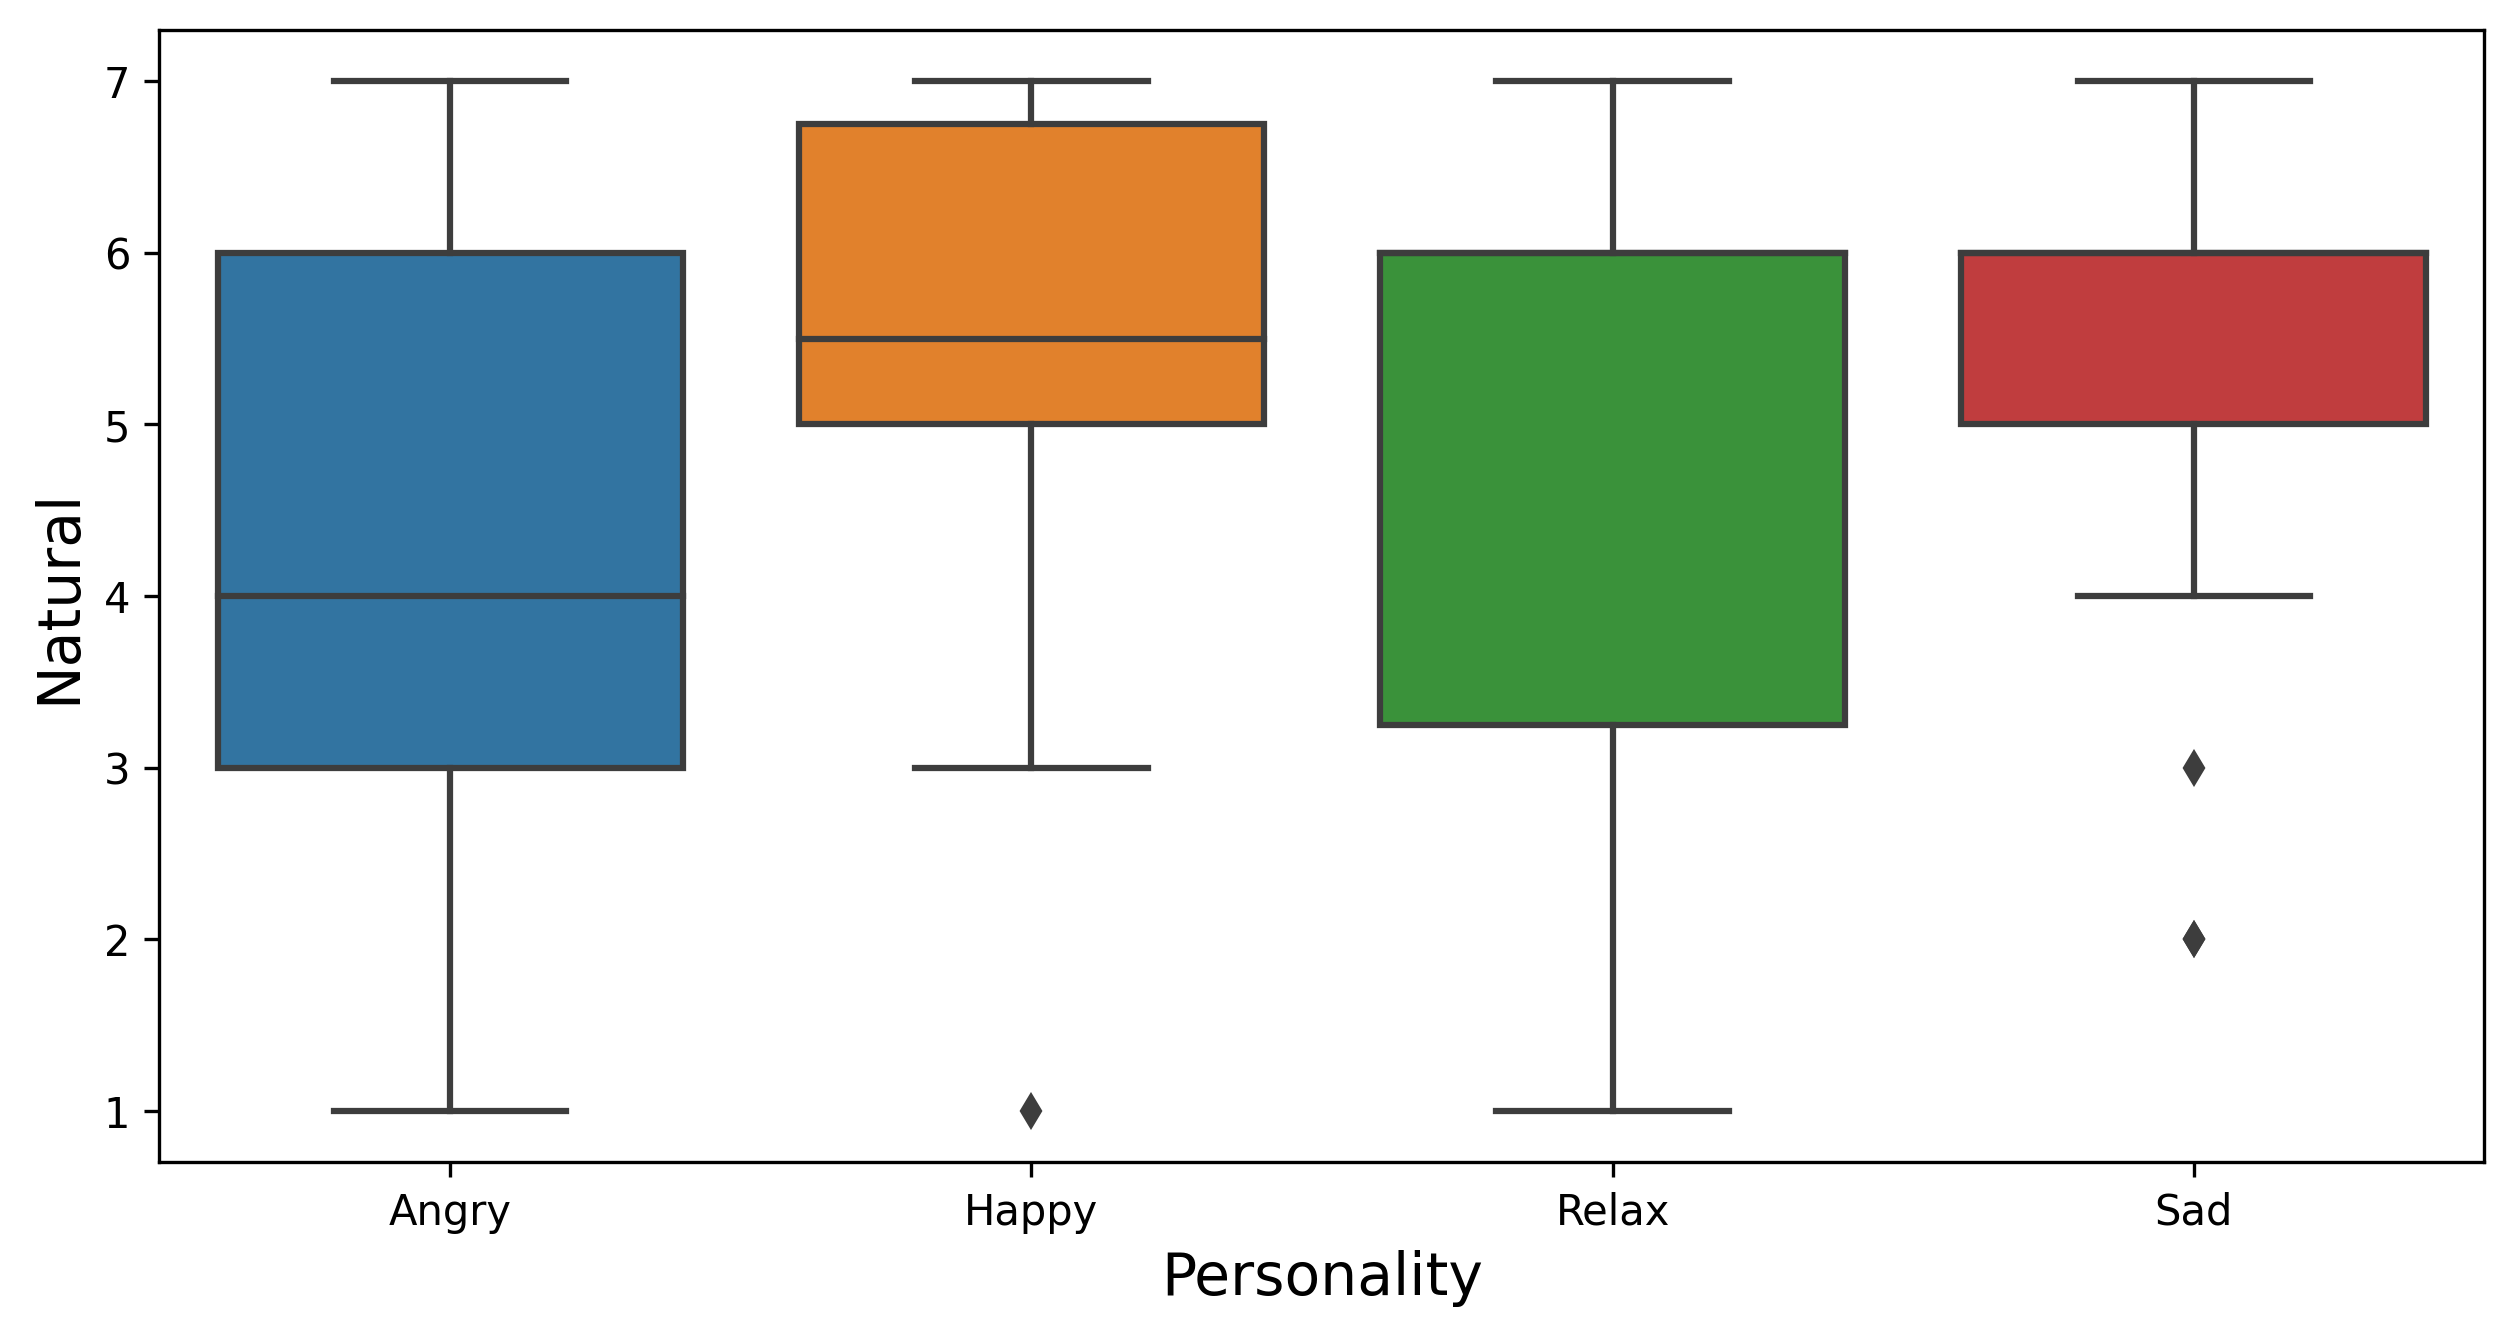

P-value 0.1104650335299889 with significance -


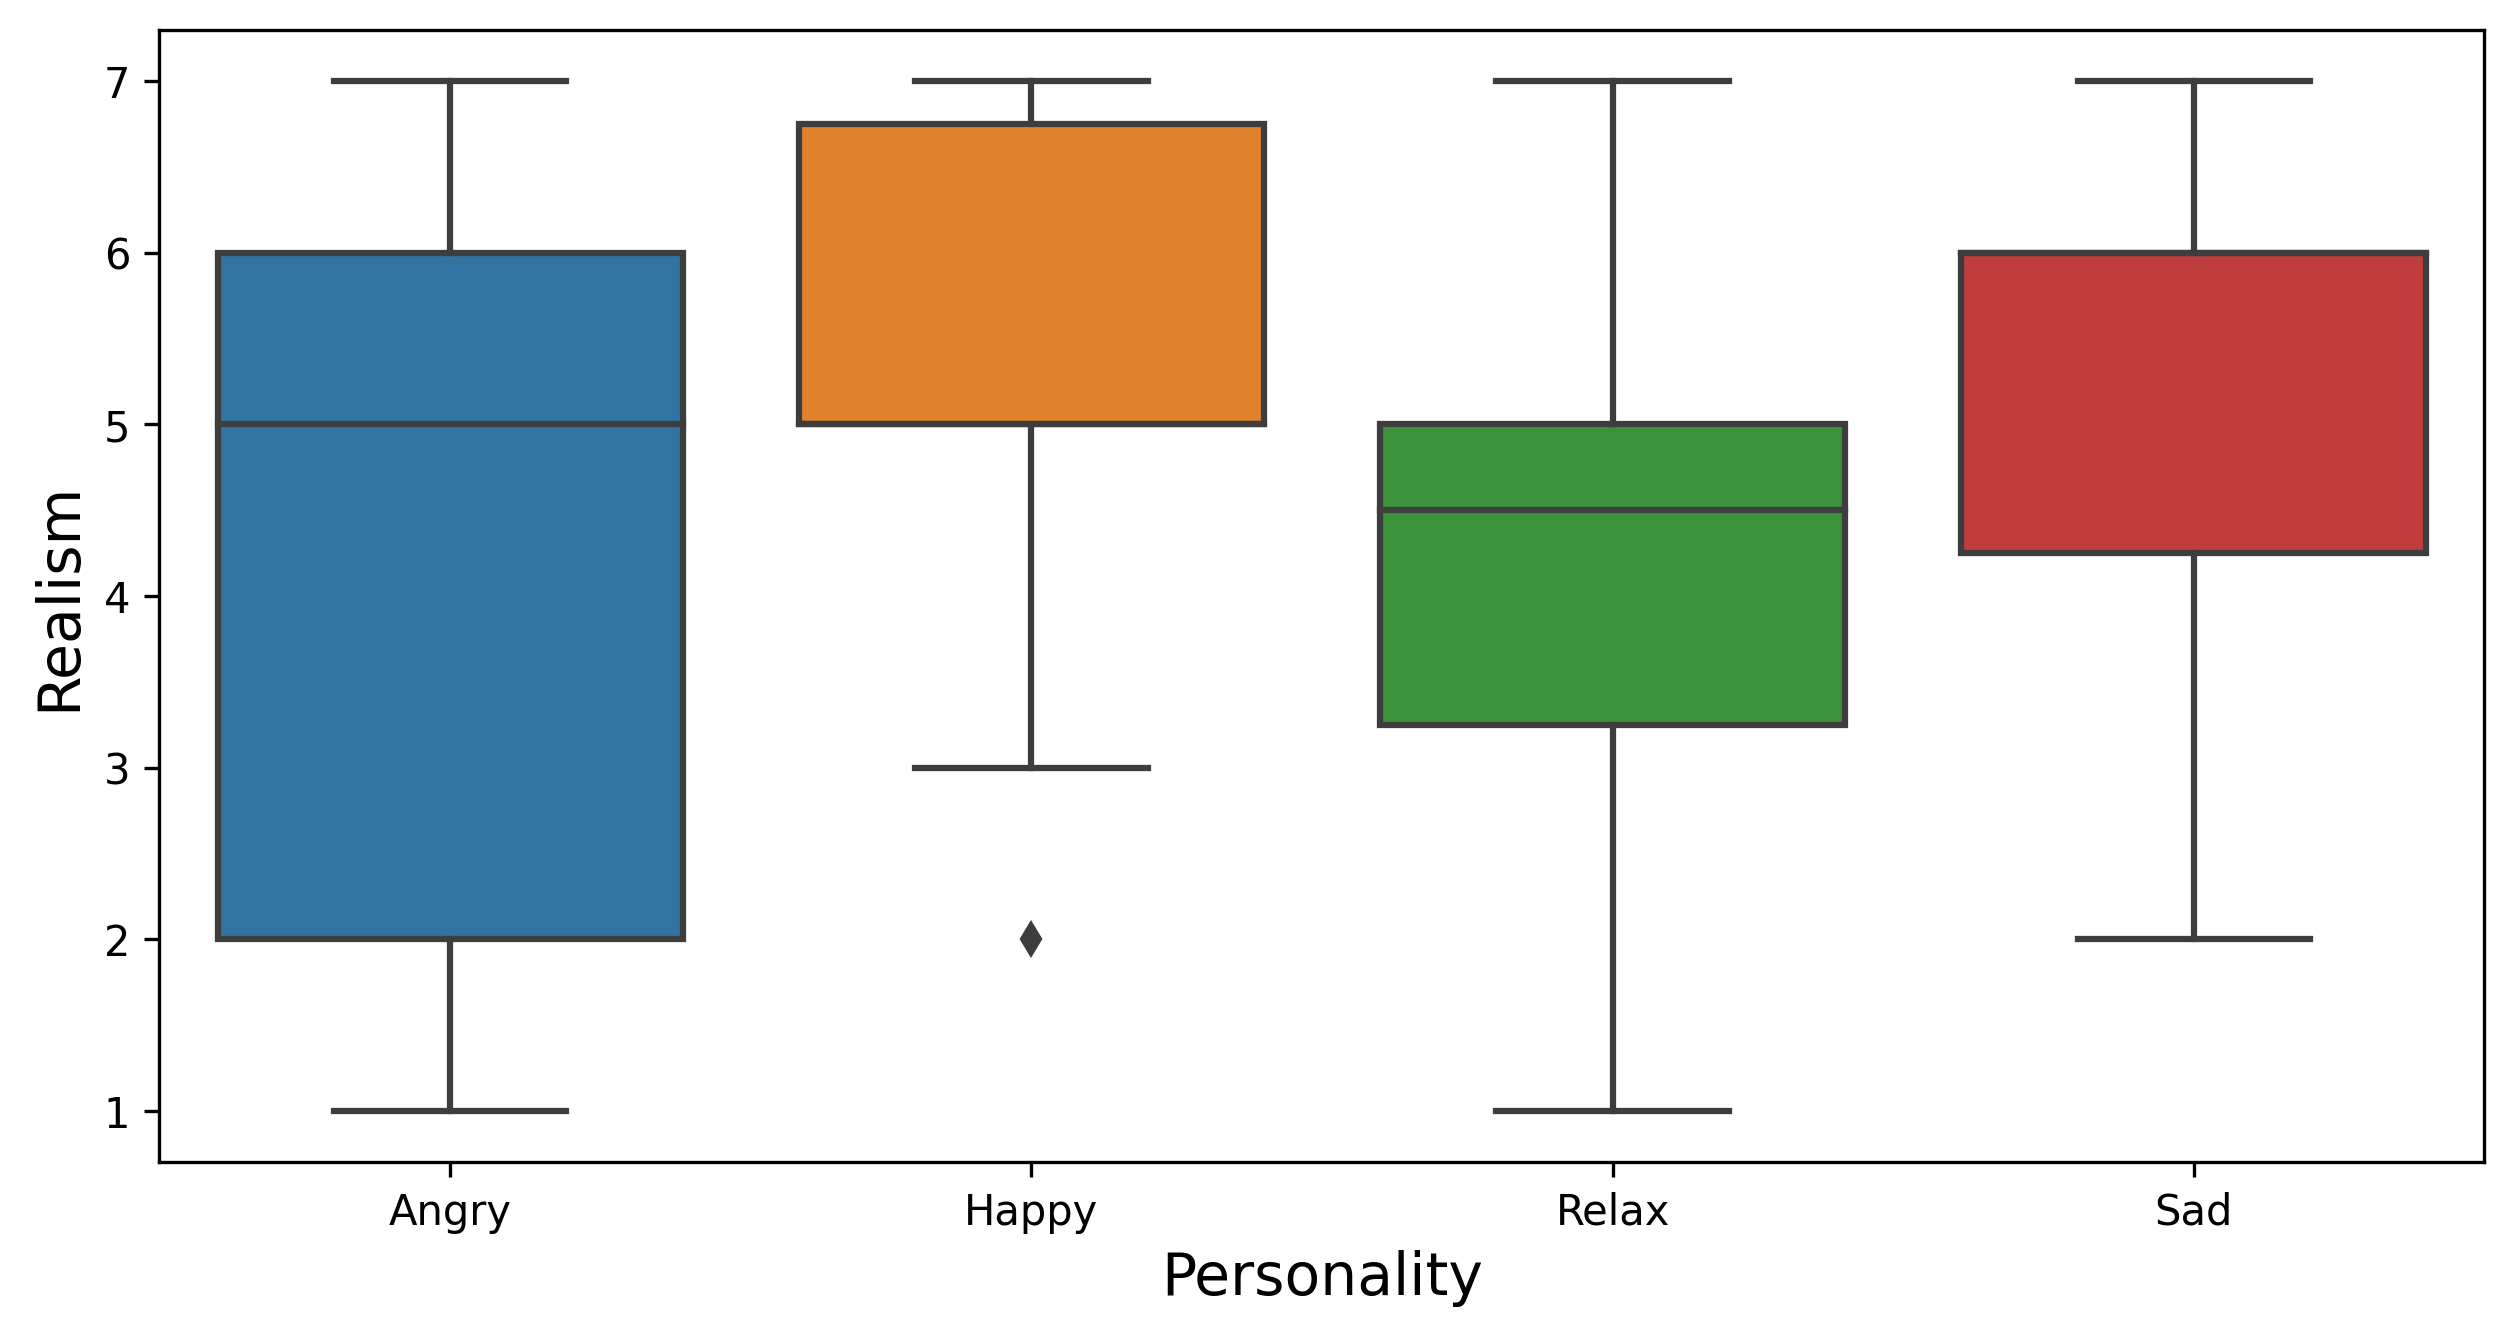

In [76]:
aute.make_binary_plot(data=df_all_cuest, 
                      x_feat="Personality", x_name="Personality", 
                      y_feat="Question1", y_name="Natural")

aute.make_binary_plot(data=df_all_cuest, 
                      x_feat="Personality", x_name="Personality", 
                      y_feat="Question2", y_name="Realism")

# Quizá deberia combinar ambos plots, donde por cada personalidad hay dos boxplots, uno de realismo y otro de naturalidad. 

### SAM Cuest

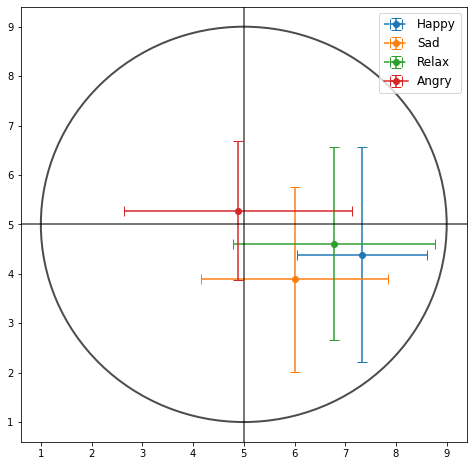

In [79]:
# #######################
# ### SAM for Subject ###
# #######################

circle2 = plt.Circle((5, 5), 4, color='black', fill=False, linewidth=2, alpha=0.7)

fig, ax = plt.subplots(figsize=(8, 8)) # note we must use plt.subplots, not plt.subplot
# (or if you have an existing figure)
# fig = plt.gcf()
# ax = fig.gca()

plt.errorbar(df_happy["Question3"].mean(), df_happy["Question4"].mean(), 
             xerr=df_happy["Question3"].std(), yerr=df_happy["Question4"].std(), 
             marker='o', capsize=5, linestyle="--", label="Happy")

plt.errorbar(df_sad["Question3"].mean(), df_sad["Question4"].mean(), 
             xerr=df_sad["Question3"].std(), yerr=df_sad["Question4"].std(),
             marker='o', capsize=5, linestyle="--", label="Sad")

plt.errorbar(df_relax["Question3"].mean(), df_relax["Question4"].mean(), 
             xerr=df_relax["Question3"].std(), yerr=df_relax["Question4"].std(), 
             marker='o', capsize=5, linestyle="--", label="Relax")

plt.errorbar(df_angry["Question3"].mean(), df_angry["Question4"].mean(), 
             xerr=df_angry["Question3"].std(), yerr=df_angry["Question4"].std(),
             marker='o', capsize=5, label="Angry")

ax.add_patch(circle2)

plt.axvline(5, c="black", alpha=0.7)
plt.axhline(5, c="black", alpha=0.7)

plt.legend(fontsize=12)

plt.savefig("Results/Images/SAMSubject.pdf", dpi=300, format="pdf")
plt.show()

In [89]:
personality_list = ["Angry", "Happy", "Sad", "Relax"]

results_subject_list = []
for i_p1, p1 in enumerate(personality_list[:-1]):
    for p2 in personality_list[(i_p1+1):]:
        # print("Personality", p1, p2)
        
        x1 = df_all_cuest[df_all_cuest["Personality"] == p1]["Question3"]
        x2 = df_all_cuest[df_all_cuest["Personality"] == p2]["Question3"]
        
        _, p_value_valencia = sp.stats.mannwhitneyu(x1, x2)
        
        x1 = df_all_cuest[df_all_cuest["Personality"] == p1]["Question4"]
        x2 = df_all_cuest[df_all_cuest["Personality"] == p2]["Question4"]
        
        _, p_value_arousal = sp.stats.mannwhitneyu(x1, x2)
        
        results_subject_list.append({
            "Personality 1": p1,
            "Personality 2": p2,
            "NumSamples": len(x1),
            "Valencia p-value": p_value_valencia,
            "Valencia p-value sig": aute.get_p_string(p_value_valencia),
            "Arousal p-value": p_value_arousal,
            "Arousal p-value sig": aute.get_p_string(p_value_arousal),
        })
        
pd.DataFrame(results_subject_list)

,Personality 1,Personality 2,NumSamples,Valencia p-value,Valencia p-value sig,Arousal p-value,Arousal p-value sig
0,Angry,Happy,18,0.001503,**,0.267044,-
1,Angry,Sad,18,0.119427,-,0.029107,*
2,Angry,Relax,18,0.014902,*,0.405821,-
3,Happy,Sad,18,0.033496,*,0.428924,-
4,Happy,Relax,18,0.704924,-,0.783873,-
5,Sad,Relax,18,0.184546,-,0.237471,-


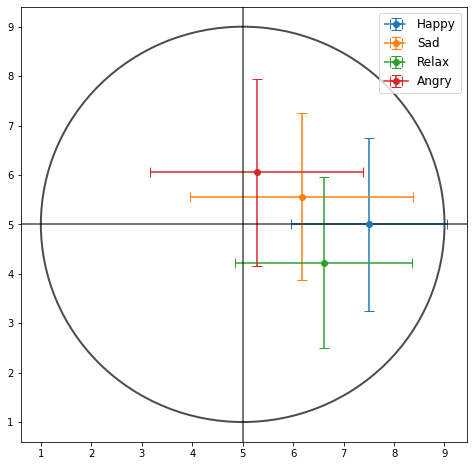

In [80]:
# ######################
# ### SAM for Avatar ###
# ######################

circle2 = plt.Circle((5, 5), 4, color='black', fill=False, linewidth=2, alpha=0.7)

fig, ax = plt.subplots(figsize=(8, 8)) # note we must use plt.subplots, not plt.subplot
# (or if you have an existing figure)
# fig = plt.gcf()
# ax = fig.gca()

plt.errorbar(df_happy["Question6"].mean(), df_happy["Question7"].mean(), 
             xerr=df_happy["Question6"].std(), yerr=df_happy["Question7"].std(), 
             marker='o', capsize=5, linestyle="--", label="Happy")

plt.errorbar(df_sad["Question6"].mean(), df_sad["Question7"].mean(), 
             xerr=df_sad["Question6"].std(), yerr=df_sad["Question7"].std(),
             marker='o', capsize=5, linestyle="--", label="Sad")

plt.errorbar(df_relax["Question6"].mean(), df_relax["Question7"].mean(), 
             xerr=df_relax["Question6"].std(), yerr=df_relax["Question7"].std(), 
             marker='o', capsize=5, linestyle="--", label="Relax")

plt.errorbar(df_angry["Question6"].mean(), df_angry["Question7"].mean(), 
             xerr=df_angry["Question6"].std(), yerr=df_angry["Question7"].std(),
             marker='o', capsize=5, label="Angry")

ax.add_patch(circle2)

plt.axvline(5, c="black", alpha=0.7)
plt.axhline(5, c="black", alpha=0.7)

plt.legend(fontsize=12)

plt.savefig("Results/Images/SAMVH.pdf", dpi=300, format="pdf")
plt.show()

In [90]:
personality_list = ["Angry", "Happy", "Sad", "Relax"]

results_vh_list = []
for i_p1, p1 in enumerate(personality_list[:-1]):
    for p2 in personality_list[(i_p1+1):]:
        # print("Personality", p1, p2)
        
        x1 = df_all_cuest[df_all_cuest["Personality"] == p1]["Question6"]
        x2 = df_all_cuest[df_all_cuest["Personality"] == p2]["Question6"]
        
        _, p_value_valencia = sp.stats.mannwhitneyu(x1, x2)
        
        x1 = df_all_cuest[df_all_cuest["Personality"] == p1]["Question7"]
        x2 = df_all_cuest[df_all_cuest["Personality"] == p2]["Question7"]
        
        _, p_value_arousal = sp.stats.mannwhitneyu(x1, x2)
        
        results_vh_list.append({
            "Personality 1": p1,
            "Personality 2": p2,
            "NumSamples": len(x1),
            "Valencia p-value": p_value_valencia,
            "Valencia p-value sig": aute.get_p_string(p_value_valencia),
            "Arousal p-value": p_value_arousal,
            "Arousal p-value sig": aute.get_p_string(p_value_arousal),
        })
        
pd.DataFrame(results_vh_list)

,Personality 1,Personality 2,NumSamples,Valencia p-value,Valencia p-value sig,Arousal p-value,Arousal p-value sig
0,Angry,Happy,18,0.001869,**,0.053749,-
1,Angry,Sad,18,0.210267,-,0.331381,-
2,Angry,Relax,18,0.069709,-,0.002156,**
3,Happy,Sad,18,0.075473,-,0.313967,-
4,Happy,Relax,18,0.116924,-,0.150883,-
5,Sad,Relax,18,0.606451,-,0.021194,*


### Final questions VAS Cuest

In [49]:
features_to_change_subject = [
    'Disgusto', 'Felicidad', 'Enfado', 'Miedo', 'Relajado',
    'Sorpresa', 'Tristeza'
]

features_to_change_avatar = [
    'Disgusto.1', 'Felicidad.1', 'Enfado.1',
    'Miedo.1', 'Relajado.1', 'Sorpresa.1', 'Tristeza.1'
]

def achieve_vas_boxplot(data):
    state_vas_plot_list = []
    for i in range(data.shape[0]):
        if "User" in data["Usuario"].iloc[i]:
            for feat in features_to_change_subject:
                state_vas_plot_list.append({
                    "User": data["Usuario"].iloc[i],
                    "State": feat,
                    "Value": data[feat].iloc[i],
                    "Agent": "Human"
                })

            for feat in features_to_change_avatar:
                new_feat = feat.split(".")[0]
                state_vas_plot_list.append({
                    "User": data["Usuario"].iloc[i],
                    "State": new_feat,
                    "Value": data[feat].iloc[i],
                    "Agent": "VH"
                })

    return pd.DataFrame(state_vas_plot_list)

Angry


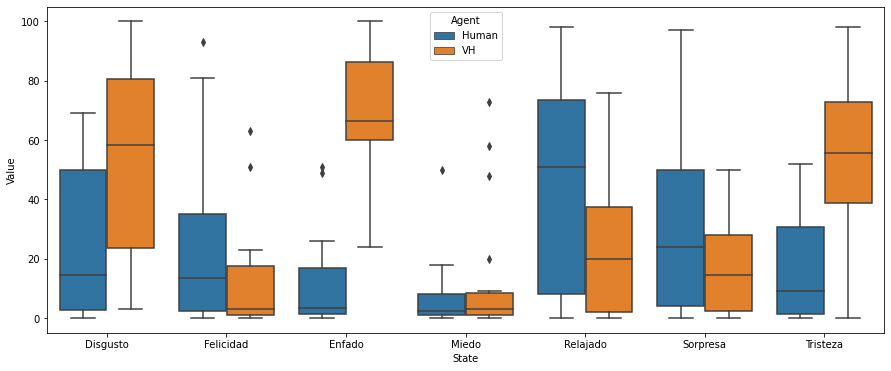

Happy


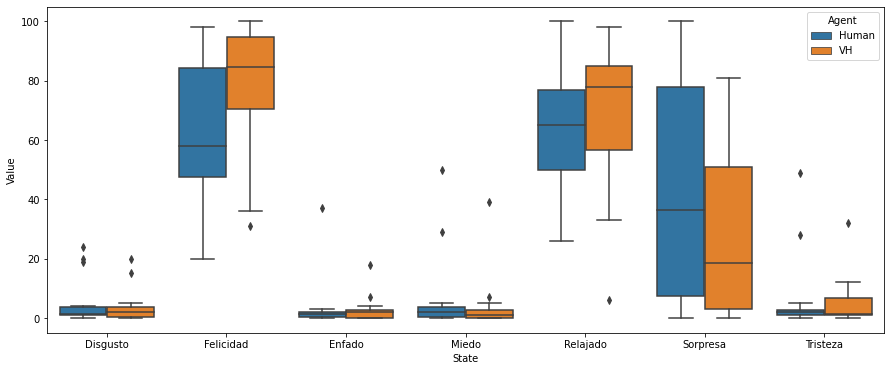

Sad


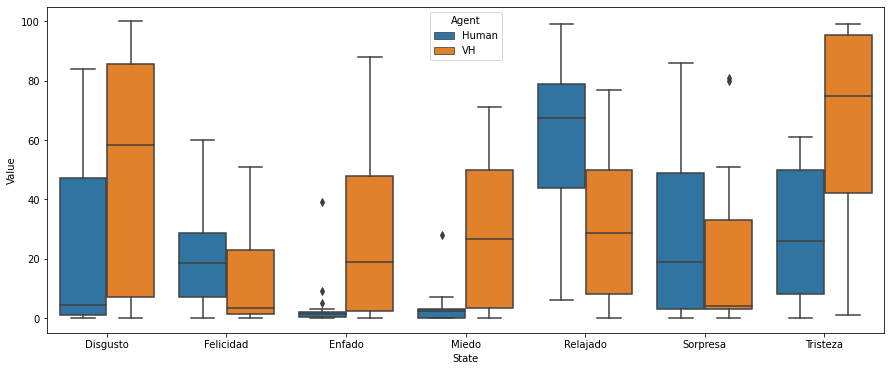

Relax


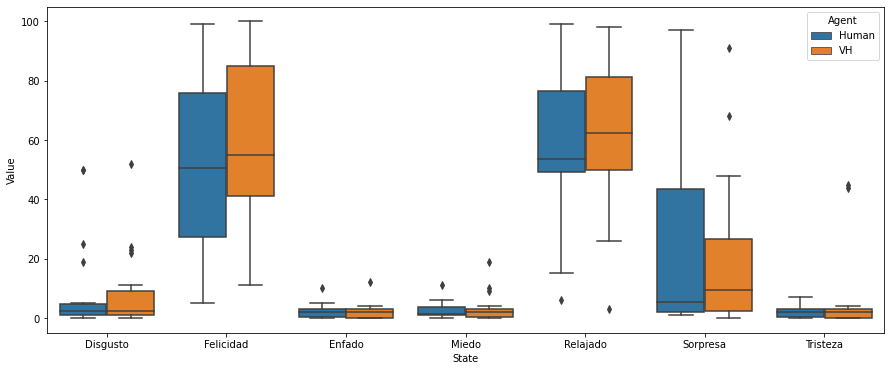

In [53]:
# Angry
print("Angry")
df_angry_vas_plot= achieve_vas_boxplot(df_angry)

plt.figure(figsize=(15, 6))

sns.boxplot(x="State", y="Value", hue="Agent", data=df_angry_vas_plot)
plt.savefig("Results/Images/AngryVASBosplot.pdf", dpi=300, format="pdf")
plt.show()

# Happy
print("Happy")
df_happy_vas_plot= achieve_vas_boxplot(df_happy)

plt.figure(figsize=(15, 6))

sns.boxplot(x="State", y="Value", hue="Agent", data=df_happy_vas_plot)
plt.savefig("Results/Images/HappyVASBosplot.pdf", dpi=300, format="pdf")
plt.show()

# Sad
print("Sad")
df_sad_vas_plot= achieve_vas_boxplot(df_sad)

plt.figure(figsize=(15, 6))

sns.boxplot(x="State", y="Value", hue="Agent", data=df_sad_vas_plot)
plt.savefig("Results/Images/SadVASBosplot.pdf", dpi=300, format="pdf")
plt.show()

# Relax
print("Relax")
df_relax_vas_plot= achieve_vas_boxplot(df_relax)

plt.figure(figsize=(15, 6))

sns.boxplot(x="State", y="Value", hue="Agent", data=df_relax_vas_plot)
plt.savefig("Results/Images/RelaxVASBosplot.pdf", dpi=300, format="pdf")
plt.show()